800


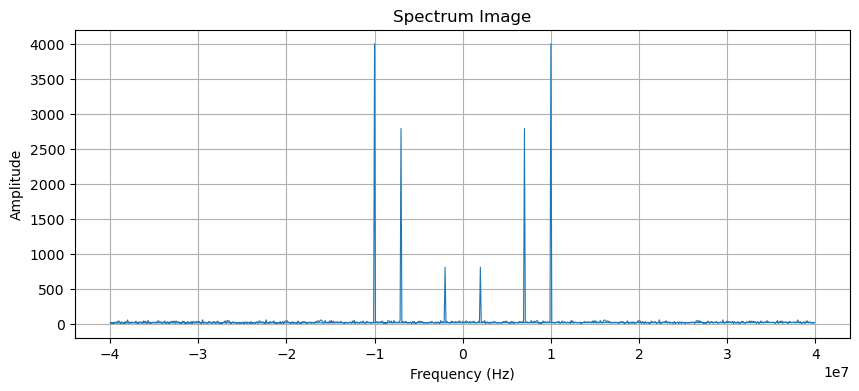

In [50]:
import numpy as np
import matplotlib.pyplot as plt
m, n = 40,800
# 128x256矩阵，每个元素服从Gauss随机分布
A = np.random.randn(m, n)

# 设置时间参数
t = np.linspace(0, 1e-5, n, endpoint=False)  # 1秒内采样10000次
# 生成信号
signal_2M = 2 * np.cos(2 * np.pi * 2e6 * t)  # 幅度为2
signal_7M = 7 * np.cos(2 * np.pi * 7e6 * t)  # 幅度为7
signal_10M = 10 * np.cos(2 * np.pi * 10e6 * t)  # 幅度为10

# 叠加信号
final_signal = signal_2M + signal_7M + signal_10M

# 叠加噪声
SNR_dB = 20
SNR_linear = 10**(SNR_dB / 10)  # 转换为线性信噪比
noise_power = np.var(final_signal) / SNR_linear  # 计算噪声功率
noise = np.sqrt(noise_power) * np.random.randn(len(final_signal))  # 生成高斯白噪声

final_signal = final_signal + noise

fft_result = np.fft.fft(final_signal)
fft_freq = np.fft.fftfreq(len(t), t[1] - t[0])  # 计算频率

# 取FFT结果的绝对值，得到幅度谱
fft_amplitude = np.abs(fft_result)
threshold = 1e-10
fft_amplitude[fft_amplitude < threshold] = 0 #这段代码的意思是，把FFT后很接近0的点都直接变为0 这里我发现，不设置为0时，恢复效果更好？
fft_amplitude_transpose = (fft_amplitude).reshape(len(fft_amplitude) ,1)
print(len(fft_amplitude_transpose))

# print(fft_amplitude)
# 绘制频谱
plt.figure(figsize=(10, 4))
plt.plot(fft_freq[:len(fft_freq)], fft_amplitude, linewidth=0.8)  # 正负频率都显示
plt.title('Spectrum Image')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

#fft_freq是从0到最大频率，再从最大负频率到0，amplitude也是按照这个顺序，所以这张图是正常的一个频谱图，但如果只是print出来amplitude，他就是最下面恢复出来的样子

u = fft_amplitude_transpose
b = np.dot(A, u)

In [51]:
import numpy as np 
from scipy import optimize as op 

def BP_linprog(Phi, s):
    '''
    s = Phi * alpha
    (Given Phi & s, try to derive alpha, alpha is a sparse vector)
    
    Parameters
    ----------
    Phi : A matrix.
    s : A vector.

    Returns
    -------
    alpha : vector
        Optimal solutions of equations under L1 norm.
        
    Reference
    ---------
    Chen S S, Donoho D L, Saunders M A. Atomic decomposition by basis pursuit[J]. 
    SIAM review, 2001, 43(1): 129-159.(Available at: 
    http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.37.4272&rep=rep1&type=pdf)
    
    Version: 1.0 writen by z.q.feng @2022.03.13
    '''
    s, Phi = np.array(s), np.array(Phi)
    if np.size(s, 0) < np.size(s, 1):       # 检查 s 的维度，如果它的行数小于列数，就将其转置，确保 s 成为一个列向量。
        s = s.T             
    p = np.size(Phi, 1)                     # 计算矩阵 Phi 的列数，将结果存储在变量 p 中
    # according to section 3.1 of the reference
    c = np.ones([2 * p, 1])                 # 生成一个全1的列向量
    Aeq = np.hstack([Phi, -Phi])            # 水平拼接矩阵 Phi 和 -Phi，得到一个新的矩阵 Aeq，其形状为 (m, 2*p)，其中 m 是 Phi 的行数。
    beq = s
    bounds = [(0, None) for i in range(2 * p)]
    x0 = op.linprog(c, A_eq = Aeq, b_eq = beq, bounds = bounds,
                    method='revised simplex')['x']
    alpha = x0[:p] - x0[p:]
    return np.array([alpha])



恢复残差: 1526.658975223574


C:\Users\29666\AppData\Local\Temp\ipykernel_29440\709301293.py:36: DeprecationWarning: `method='revised simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  x0 = op.linprog(c, A_eq = Aeq, b_eq = beq, bounds = bounds,


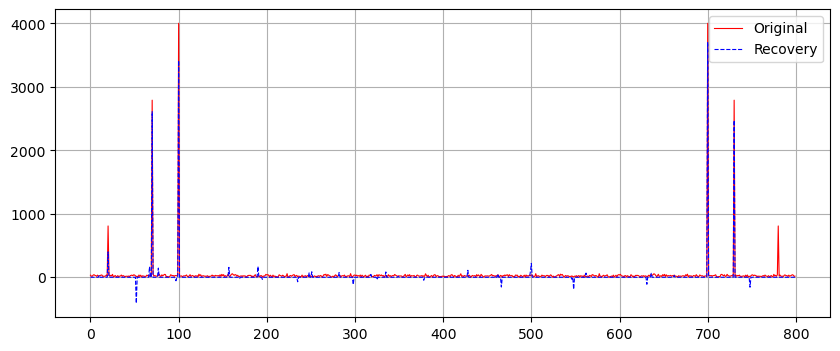

800
[[ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 3.15402083e+01]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 3.99941608e+02]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [-4.102

In [52]:
alpha = BP_linprog(A, b)
# 恢复残差 
print('\n恢复残差:', np.linalg.norm(alpha.T - u, 2))
# 绘图
plt.figure(figsize = (10, 4))
# 绘制原信号
plt.plot(u, 'r', linewidth = 0.8, label = 'Original')
# 绘制恢复信号
plt.plot(alpha.T, 'b--', linewidth=0.8, label = 'Recovery')
plt.grid()
plt.legend()
plt.show()
print(len(alpha.T))
print(alpha.T) 